In [1]:
import cv2
import numpy as np
import glob

In [ ]:
# Model weights (yolov4.weights) needs to be download and keep in the directory 'dnn_model/''

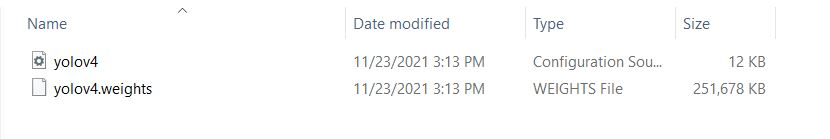

In [2]:
# Load Network
net = cv2.dnn.readNet("dnn_model/yolov4.weights", "dnn_model/yolov4.cfg")

model = cv2.dnn_DetectionModel(net)

model.setInputParams(size=(832, 832), scale=1 / 255)

# Vechicle ids (car,bike,bus etc)
classes_allowed = [2, 3, 5, 6, 7]

In [ ]:
# Load images from a folder
images_folder = glob.glob("images/*.jpg")

vehicles_folder_count = 0

for img_path in images_folder:
    print("Img path", img_path)
    img = cv2.imread(img_path)
    
    # Object Detection
    vehicles_boxes = []
    class_ids, scores, boxes = model.detect(img, nmsThreshold=0.4)
    
    for class_id, score, box in zip(class_ids, scores, boxes):
        if score < 0.5:
            # Skip detection with low confidence
            continue
        
        if class_id in classes_allowed:
            vehicles_boxes.append(box)
    
    vehicle_count = len(vehicles_boxes)
    
     # Update total count
    vehicles_folder_count += vehicle_count
    
    for box in vehicles_boxes:
        x, y, w, h = box

        cv2.rectangle(img, (x, y), (x + w, y + h), (25, 0, 180), 3)

        cv2.putText(img, "Vehicles: " + str(vehicle_count), (20, 50), 0, 2, (100, 200, 0), 3)
    
    img = cv2.resize(img, (540, 600))
    cv2.imshow("Cars", img,)
    cv2.waitKey(1)
            
print("Total current count", vehicles_folder_count)

Img path images\pexels-adrien-olichon-2387615.jpg
Img path images\pexels-aleks-magnusson-3441201.jpg
Img path images\pexels-aleksey-kuprikov-3568630.jpg
Img path images\pexels-alex-pham-950223.jpg
Img path images\pexels-ashley-fontana-705774.jpg
Img path images\pexels-charles-kettor-1077785.jpg
Img path images\pexels-charles-parker-5845724.jpg
